# browserless 크롤링

- 앞선 selenium은 물리적으로 직접 브라우저를 켜 놓고 크롤링을 했습니다.
- 이렇게 크롤링을 하면 사람과 컴퓨터를 구분할 수 없기 때문에 크롤링을 막는 사이트를 뚫기 유용하고
- 무엇보다 눈에 동작이 보여서 직관적이지만 실행속도가 느리다는 단점이 있습니다.

- selenium을 통한 크롤링 시에는 특히 비동기 요청이나 api 크롤링을 하는데 어려움이 있기 때문에
- 이를 보완하기 위해 requests를 사용합니다.

In [1]:
import requests # selenium과 달리 내장되어있어서 따로 설치할 필요없음
from bs4 import BeautifulSoup
import time
import codecs

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
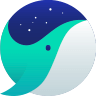
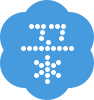

In [2]:
# 1. requests.get("접속주소") 로 접속
res = requests.get("https://www.naver.com")
# 2. 받아온 변수 res.text를 하면 해당 페이지의 소스코드가 나옵니다.
source = res.text
source

In [6]:
# 위 내용을 토대로 교보문고 순회 크롤러를 이용해 1~200위까지의 도서 제목, 가격, 저자를 얻어와서
# txt나 csv파일로 만들어주세요.
# 전체 제목, 작가, 가격정보를 저장하기 위한 리스트 생성

# 각 항목들을 순차적으로 저장하기 위해 빈 리스트 선언
title_list = []
author_list = []
price_list = []

# 텍스트 파일저장
f = codecs.open("c:/crawler2/kyobo2.txt", mode="w", encoding="utf-8")

for i in range(1, 5):
    time.sleep(3)
    # 해당 주소 접속 정보를 res에 저장
    res = requests.get("https://www.kyobobook.co.kr/bestSellerNew/bestseller.laf?targetPage=%s" % i)
    # res변수에 저장된 소스코드만 뽑아서 source변수에 저장
    source = res.text

    bs = BeautifulSoup(source, "html.parser")

    # 리스트가 아닌 단 하나의 태그를 얻어옴
    ul_tag = bs.find("ul", class_="list_type01")
    # find는 리스트 형식으로 가져오지 않기 때문에, 인덱싱 없이 바로 추가 명령을 내릴 수 있습니다.
    title_tag_list = ul_tag.find_all("div", class_="title")
    author_tag_list = ul_tag.find_all("div", class_="author")
    price_tag_list = ul_tag.find_all("div", class_="price")

    for item in title_tag_list:
        title_list.append(item.text.strip().replace("\n","").replace("\t", ""))

    for item in author_tag_list:
        author_list.append(item.text.strip().replace("\n","").replace("\t", "").replace("\r", ""))

    for item in price_tag_list:
        price_list.append(item.text.strip().replace("\n","").replace("\t", "").replace("\r", ""))
# title_tag_list에 200개의 요소가 들어있으므로 인덱스번호를 이용해 텍스트파일화
for i in range(len(title_list)):
    f.write("%s위 책 정보\n" % (i + 1))
    f.write(title_list[i] + "\n")
    f.write(author_list[i] + "\n")
    f.write(price_list[i] + "\n")
    f.write("--------------------\n")
f.close()